# Activity: Perform multiple linear regression


## Introduction

As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis. 

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [2]:
# Import libraries and modules.

### YOUR CODE HERE ### 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('../../../data/marketing_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

[Write your response here. Double-click (or enter) to edit.]

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

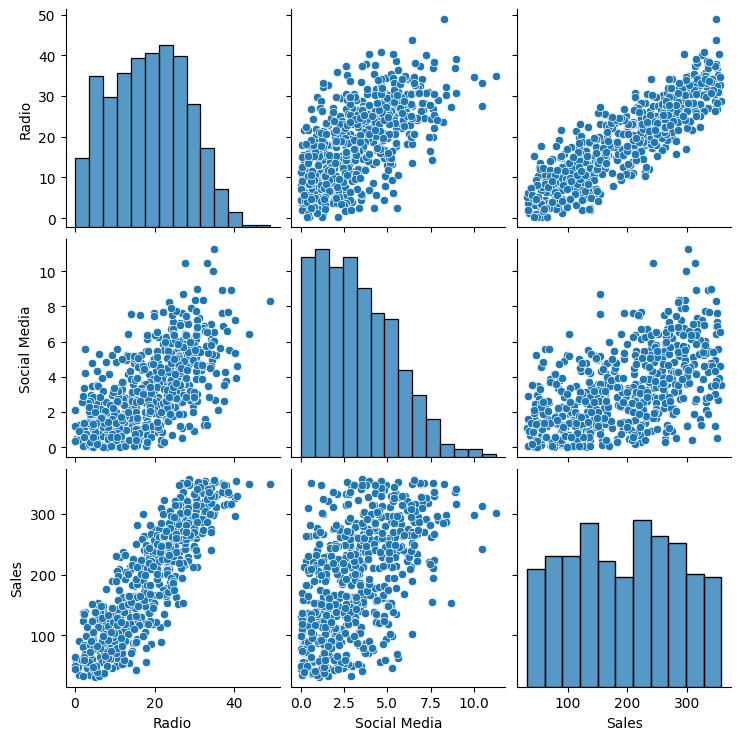

In [5]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data);

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content where creating a pairplot is demonstrated](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/item/dnjWm).

</details>


<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a pairplot showing the relationships between variables in the data.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `pairplot()` function from the `seaborn` library and pass in the entire DataFrame.

</details>


**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



[Write your response here. Double-click (or enter) to edit.]

### Calculate the mean sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

In [6]:
# Calculate the mean sales for each TV category. 

### YOUR CODE HERE ### 

mean_sales_tv = data.groupby('TV')['Sales'].mean()
print(mean_sales_tv)

# Calculate the mean sales for each Influencer category. 

### YOUR CODE HERE ### 

mean_sales_influencer = data.groupby('Influencer')['Sales'].mean()
print(mean_sales_influencer)

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64
Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Find the mean `Sales` when the `TV` promotion is `High`, `Medium`, or `Low`.
    
Find the mean `Sales` when the `Influencer` promotion is `Macro`, `Mega`, `Micro`, or `Nano`.  

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `groupby` operation in `pandas` to split an object (e.g., data) into groups and apply a calculation to each group.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To calculate the mean `Sales` for each `TV` category, group by `TV`, select the `Sales` column, and then calculate the mean. 
    
Apply the same process to calculate the mean `Sales` for each `Influencer` category.

</details>

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



[Write your response here. Double-click (or enter) to edit.]

### Remove missing data

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [9]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 

data.dropna(inplace=True, axis=1)
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `data.dropna(axis=0)` to drop all rows with missing values in `data`. Be sure to properly update the DataFrame.

</details>

### Clean column names

The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed.

In [10]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [11]:
# Rename all columns in data that contain a space. 

### YOUR CODE HERE ### 

data.columns = ["TV", "Radio", "Social_Media", "Influencer", "Sales"]
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is one column name that contains a space. Search for it in `data`.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `Social Media` column name in `data` contains a space. This is not allowed in the `ols()` function.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `rename()` function in `pandas` and use the `columns` argument to provide a new name for `Social Media`.

</details>

## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [12]:
# Define the OLS formula.

### YOUR CODE HERE ### 

ols_formula = "Sales ~ Radio + Social_Media"

# Create an OLS model.

### YOUR CODE HERE ### 

OLS = ols(formula = ols_formula, data = data)

# Fit the model.

### YOUR CODE HERE ### 

model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 

model_results = model.summary()

# Display the model results.

### YOUR CODE HERE ### 

model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     882.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          1.09e-174
Time:                        15:16:35   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5939.
Df Residuals:                     566   BIC:                             5952.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.5442      4.129     10.061      0.000      33.434      49.654
Radio            8.1758      0.246     33.251      0.000       7.693       8.659
Social_Media    -0.0181      1.076     -0.017      0.987      -2.131       2.095
==============================================================================
Omnibus:                        2.274   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.226
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         47.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content that discusses [model building](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/zd74V/interpret-multiple-regression-coefficients) for linear regression.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function imported earlier—which creates a model from a formula and DataFrame—to create an OLS model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You previously learned how to specify in `ols()` that a feature is categorical. 
    
Be sure the string names for the independent variables match the column names in `data` exactly.

</details>

**Question:** Which independent variables did you choose for the model, and why?



[Write your response here. Double-click (or enter) to edit.]

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

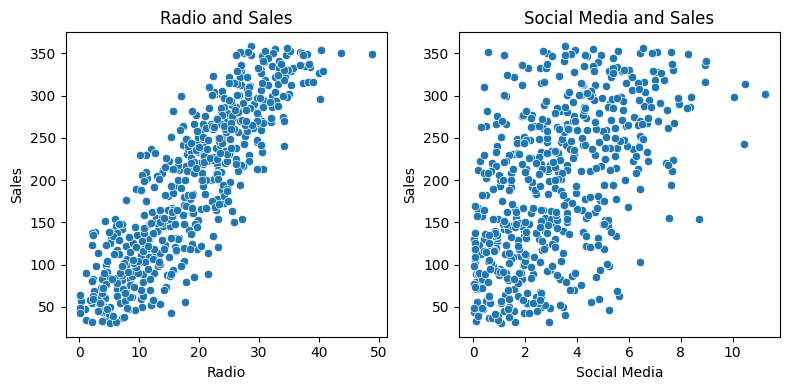

In [13]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Social Media and Sales")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Use the function in the `seaborn` library that allows you to create a scatterplot to display the values for two variables.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `scatterplot()` function in `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>
    
Pass the independent and dependent variables in your model as the arguments for `x` and `y`, respectively, in the `scatterplot()` function. Do this for each continous independent variable in your model.

</details>

**Question:** Is the linearity assumption met?


[Write your response here. Double-click (or enter) to edit.]

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

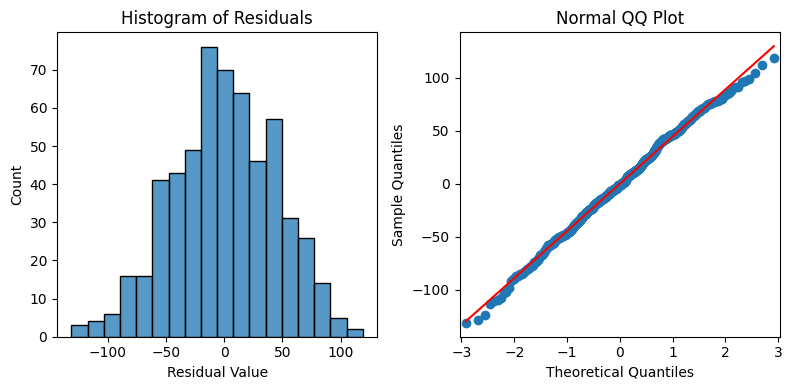

In [14]:
# Calculate the residuals.

### YOUR CODE HERE ### 

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the Q-Q plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?



[Write your response here. Double-click (or enter) to edit.]

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

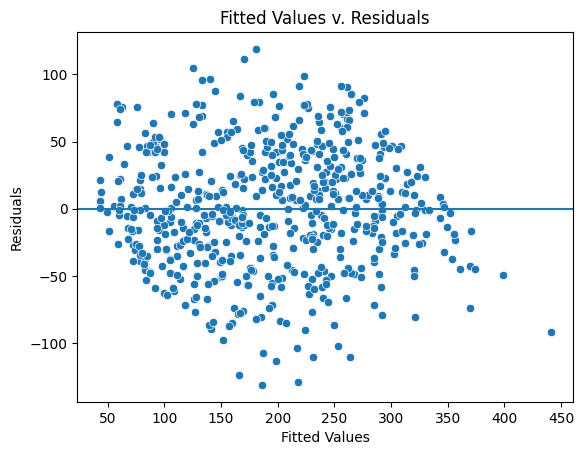

In [15]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance assumption met?




[Write your response here. Double-click (or enter) to edit.]

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

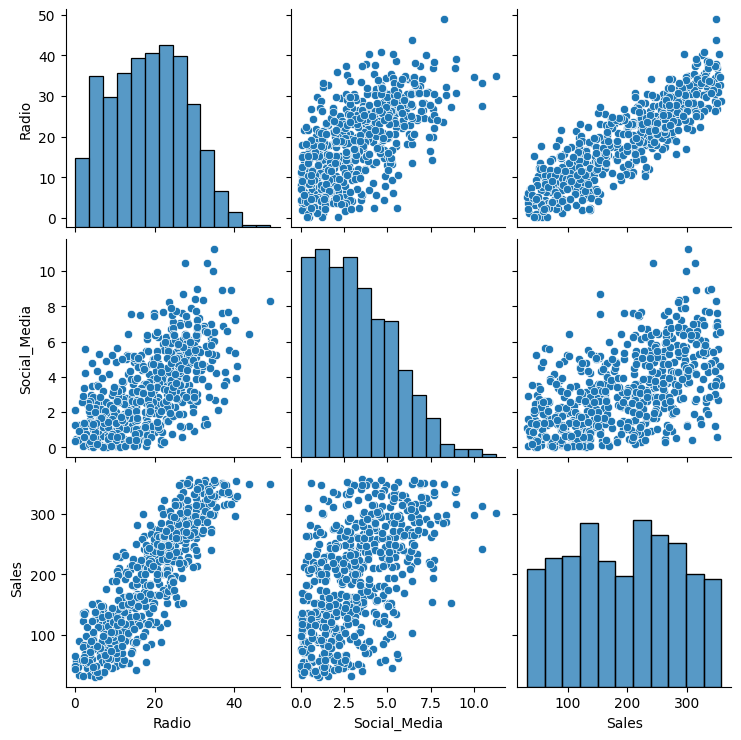

In [16]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(data)

In [ ]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 



<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Confirm that you previously created plots that could check the no multicollinearity assumption.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `pairplot()` function applied earlier to `data` plots the relationship between all continous variables  (e.g., between `Radio` and `Social Media`).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `statsmodels` library has a function to calculate the variance inflation factor called `variance_inflation_factor()`. 
    
When using this function, subset the data to only include the continous independent variables (e.g., `Radio` and `Social Media`). Refer to external tutorials on how to apply the variance inflation factor function mentioned previously.
 

</details>

**Question 8:** Is the no multicollinearity assumption met?



## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [17]:
# Display the model results summary.

### YOUR CODE HERE ### 

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif


,VIF
Radio,4.93238
Social_Media,4.93238


**Question:** What is your interpretation of the model's R-squared?


[Write your response here. Double-click (or enter) to edit.]

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [18]:
# Display the model results summary.

### YOUR CODE HERE ### 

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     882.4
Date:                Mon, 25 Aug 2025   Prob (F-statistic):          1.09e-174
Time:                        15:16:35   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5939.
Df Residuals:                     566   BIC:                             5952.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.5442      4.129     10.061      0.000      33.434      49.654
Radio            8.1758      0.246     33.251      0.000       7.693       8.659
Social_Media    -0.0181      1.076     -0.017      0.987      -2.131       2.095
==============================================================================
Omnibus:                        2.274   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.226
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         47.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What are the model coefficients?



[Write your response here. Double-click (or enter) to edit.]

**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



[Write your response here. Double-click (or enter) to edit.]

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



[Write your response here. Double-click (or enter) to edit.]

**Question:** Why is it important to interpret the beta coefficients?



[Write your response here. Double-click (or enter) to edit.]

**Question:** What are you interested in exploring based on your model?



[Write your response here. Double-click (or enter) to edit.]

**Question:** Do you think your model could be improved? Why or why not? How?

[Write your response here. Double-click (or enter) to edit.]

## Conclusion

**What are the key takeaways from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**What results can be presented from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you frame your findings to external stakeholders?**

[Write your response here. Double-click (or enter) to edit.]


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.